In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from database import user_name, password, host, data_base

In [12]:
# Create Engine and Pass in PostgreSQL Connection
engine = create_engine(f'postgresql://{user_name}:{password}@{host}/{data_base}')
connection = engine.connect()

In [13]:
# Query Table Salary in the the Database
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12


In [14]:
# Query Table Titles in the the Database
titles = pd.read_sql("SELECT * FROM titles", connection)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [15]:
# Query list employees' numbers and their corresponding titles and salaries in the the Database
employees_title_salary = pd.read_sql("SELECT e.emp_no, t.title, s.salary \
                         FROM employees e \
                         RIGHT JOIN titles t\
                         ON (e.emp_no = t.emp_no)\
                         RIGHT JOIN salaries s\
                         ON (t.emp_no = s.emp_no)", connection)
employees_title_salary.head()

,emp_no,title,salary
0,10005,Senior Staff,78228.0
1,10005,Staff,78228.0
2,10010,Engineer,72488.0
3,10011,Staff,42365.0
4,10018,Engineer,55881.0


In [16]:
# Create a DataFrame with the average salary for each title. 
avg_salary_each_title = pd.DataFrame(employees_title_salary.groupby(["title"]).mean()["salary"]).reset_index()

Text(0, 0.5, 'Average salaries')

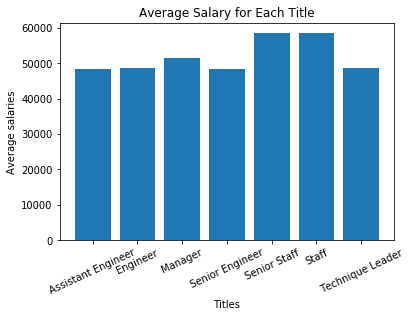

In [17]:
# Use Matplotlib to create a bar chart 
plt.bar(np.arange(len(avg_salary_each_title)), avg_salary_each_title.salary, align = "center")
plt.xticks([lable for lable in np.arange(len(avg_salary_each_title))], avg_salary_each_title["title"],
           rotation = 25)
plt.title("Average Salary for Each Title")
plt.xlabel("Titles")
plt.ylabel("Average salaries")

In [18]:
# Get information of employee's title and his salary regarding his employee's number. 
employees_title_salary.loc[employees_title_salary["emp_no"] == 499942]

,emp_no,title,salary
55487,499942,Technique Leader,40000.0
